# Demonstration of `donut_plot_with_total_binary_summary_and_binary_state_subgroups.py`

Demonstrating use of `donut_plot_with_total_binary_summary_and_binary_state_subgroups.py`, see [here](https://github.com/fomightez/donut_plots_with_subgroups) for more information.

This is a full-featured script that makes a plot similar to [the example from The Python Graph Gallery](https://python-graph-gallery.com/163-donut-plot-with-subgroups/) to the right of a plot that summarizes the subgroups. This script is full-featured **without further need for coding** that allows you to plug in your own data input. 

In the current form, these scripts and demonstration notebook work in JupyterLab, too.

-----

The two main ways of using the script are covered first featuring several of the options demonstrated in the course of that. Then some features important for adjusting the looks to match your needs, particularly through the use of a 'high-low' list to control shading, are covered.  
Plus a text-based alternative is highlighted.

## Preparation and displaying USAGE block

Let's get the script and run 'Help' on it to see the basic USAGE block.

(If you are running this notebook in the session launched from the repo that includes the script, this step is not necessary. However, it is included because there is no harm in running it here and you may be wanting to run this elsewhere or see how to easily acquire the script. If you are on the actual command line, you'd leave off the exclamation point.)

In [1]:
import os
file_needed = "donut_plot_with_total_binary_summary_and_binary_state_subgroups.py"
if not os.path.isfile(file_needed):
    !curl -OL https://raw.githubusercontent.com/fomightez/donut_plots_with_subgroups/master/donut_plot_with_total_binary_summary_and_binary_state_subgroups.py

In [2]:
%run donut_plot_with_total_binary_summary_and_binary_state_subgroups.py -h

usage: donut_plot_with_total_binary_summary_and_binary_state_subgroups.py
       [-h] [-li] [-lopg] [-lotg] [-svg] [-hll HILOLIST] [-slc]
       [-ac ADVANCE_COLOR] [-arc ADVANCE_RIGHT_COLOR]
       DF_FILE BINARY_COL GROUPS

donut_plot_with_total_binary_summary_and_binary_state_subgroups.py takes a
dataframe, and some information about columns in the dataframe and makes two
donut plots. One plot is the total of the specified binary data (such as
present or not present, +/-, True or False), and the other plot is a further
breakdown of the binary state per categorical classification or grouping. ****
Script by Wayne Decatur (fomightez @ github) ***

positional arguments:
  DF_FILE               Name of file containing the dataframe. Whether it is
                        in the form of a pickled dataframe, tab-separated
                        text, or comma-separated text needs to be indicated by
                        the file extension. So `.pkl`, `.tsv`, or `.csv` for
              

## Use the script by calling it from the command line

A dataframe will be used for input data. To fully demonstrate the options for the script we'll use two dataframes.

In [3]:
import pandas as pd
sales = [('Jones LLC', 177887, 'yes'),
         ('Alpha Co', 157987, 'yes'),
         ('Alpha Co', 158981, 'yes'),
         ('Alpha Co', 159983, 'yes'),
         ('Alpha Co', 167987, 'yes'),
         ('Alpha Co', 158117, 'yes'),
         ('Alpha Co', 159333, 'no'),
         ('Alpha Co', 256521, 'no'),
         ('Blue Inc', 111947, 'no')]
labels = ['Manufacturer', 'Item', 'In_Stock']
df = pd.DataFrame.from_records(sales, columns=labels)
df.head()

,Manufacturer,Item,In_Stock
0,Jones LLC,177887,yes
1,Alpha Co,157987,yes
2,Alpha Co,158981,yes
3,Alpha Co,159983,yes
4,Alpha Co,167987,yes


Let's save that dataframe as tabular text and also as a Pickled pickled dataframe. The former being human readable and the latter not. (The latter is more efficient at storage though if that is an issue.)

First to save as tabular text in tab-separated form. You could change it to be comma-separated, CSV, if you choose.

In [4]:
df.to_csv('data.tsv', sep='\t',index = False)

Now to save the pickled dataframe.

In [5]:
df.to_pickle("data.pkl")

Now that we have files with input data, we have something we can point the script at for running it.

In addition to providing the data input file name, the column heading of the binary data and the column heading of the grouping set have to be provided when calling the script.

Note: No list to specify high to low intensity coloring provided, and so using 'yes,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Look into adding use of the `--hilolist` option to specify the order.


Plot image saved to: donut_plot.png


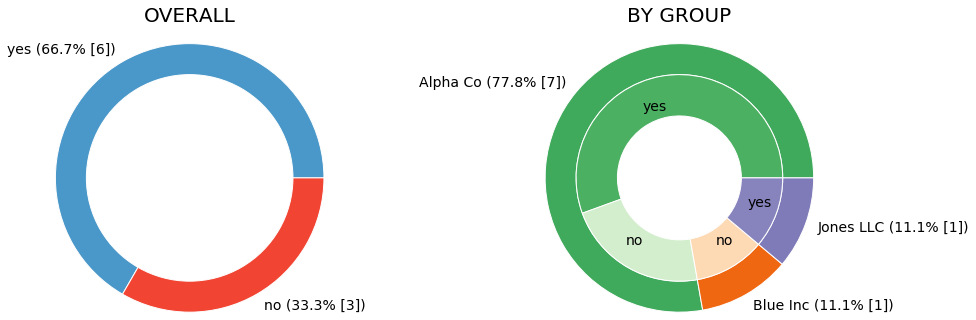

In [6]:
%run donut_plot_with_total_binary_summary_and_binary_state_subgroups.py data.tsv In_Stock Manufacturer

**This script will not work if there are more than two states in the dataframe.** (Rows with NA or NaN values for the subgroup[state] will be disregarded for this check.)

In the cell below the assertion error this will trigger will be shown by using the original data from the first page in this series.

In [7]:
%run donut_plot_with_total_binary_summary_and_binary_state_subgroups.py datao.tsv subgroup group

FileNotFoundError: [Errno 2] File b'datao.tsv' does not exist: b'datao.tsv'

The `--large_image` flag can be added to make the plot figure saved larger. 

Note: No list to specify high to low intensity coloring provided, and so using 'yes,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Look into adding use of the `--hilolist` option to specify the order.


Plot image saved to: donut_plot_larger.png


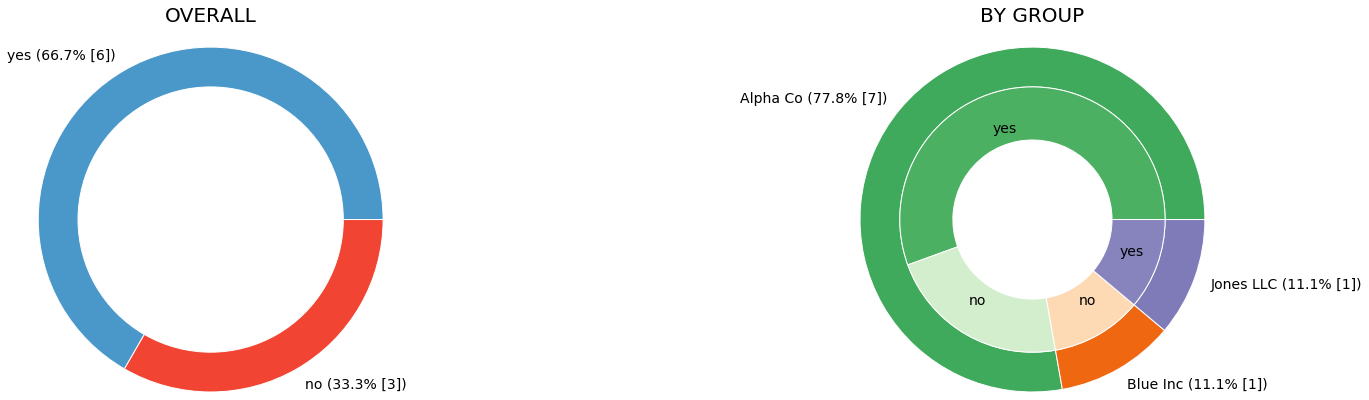

In [7]:
%run donut_plot_with_total_binary_summary_and_binary_state_subgroups.py data.tsv In_Stock Manufacturer --large_image 

The `--leave_off_percent_in_group` and `--leave_off_total_in_group` options can be used to control whether the percent or total show up in the plot labels. 
For example, putting both flags will leave both off:

Note: No list to specify high to low intensity coloring provided, and so using 'yes,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Look into adding use of the `--hilolist` option to specify the order.


Plot image saved to: donut_plot.png


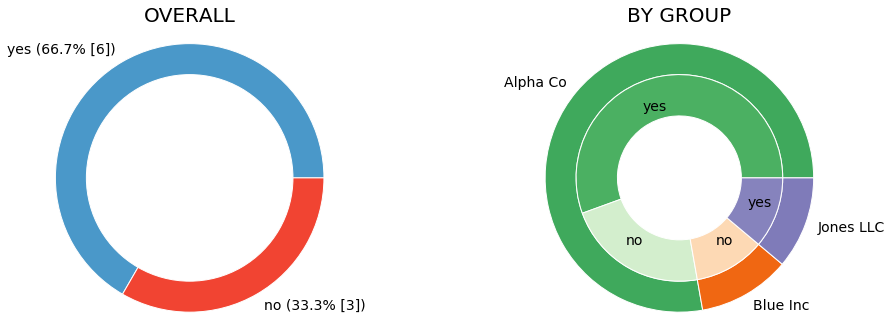

In [8]:
%run donut_plot_with_total_binary_summary_and_binary_state_subgroups.py data.tsv In_Stock Manufacturer --leave_off_percent_in_group --leave_off_total_in_group

You can change the size of the  image file made with the larger setting by adjusting `large_img_size ` under 'USER ADJUSTABLE VALUES' section in the script code.  
Several features important for adjusting the looks to match your needs, particularly through the use of a 'high-low' list to control shading and adjusting colors used for specific categories, are covered below in their own sections.  
Additional customization is possible simply editing settings under the 'USER ADJUSTABLE VALUES' section in the script code file.


----

## Use script in a Jupyter or IPython by calling the main function

This will demonstrate importing the main function into a Jupyer environment or IPython console.

Note that it gives you a few more options because it exposes more control as you can set whether to include the subplot titles or adjust after generation the size of the plot, etc..

First, we'll use the files for the dataframe and tabular text saved earlier in the example. After that will move on to not using files and instead use Python objects that are in the memory of the notebook.

We will need to import the main function of the script to be active in the running notebook environment. (There is no harm to running it again even if already run in earlier sections.)

In [9]:
from donut_plot_with_total_binary_summary_and_binary_state_subgroups import donut_plot_with_total_binary_summary_and_binary_state_subgroups

Now to try using that with the files from earlier in the demonstration.

First, we'll use the tab-separated table.

It is very similar to using the script from the command line. Here, though we have to specify the input type as file or an in-memory dataframe when we call the function. Provide a file name for `df_file` for using a data file as input. Then specify the colum with the binary data and the column to use in grouping like the following.

Note: No list to specify high to low intensity coloring provided, and so using 'yes,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order.

Plot figure object returned.

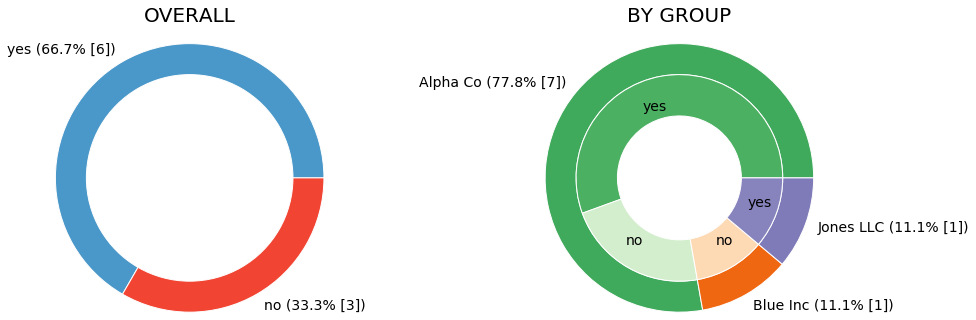

In [10]:
donut_plot_with_total_binary_summary_and_binary_state_subgroups(df_file="data.tsv",binary_state_col ="In_Stock",grouping_col="Manufacturer");


Similarly, the pickled dataframe can be used with the imported function as well.

Note: No list to specify high to low intensity coloring provided, and so using 'yes,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order.

Plot figure object returned.

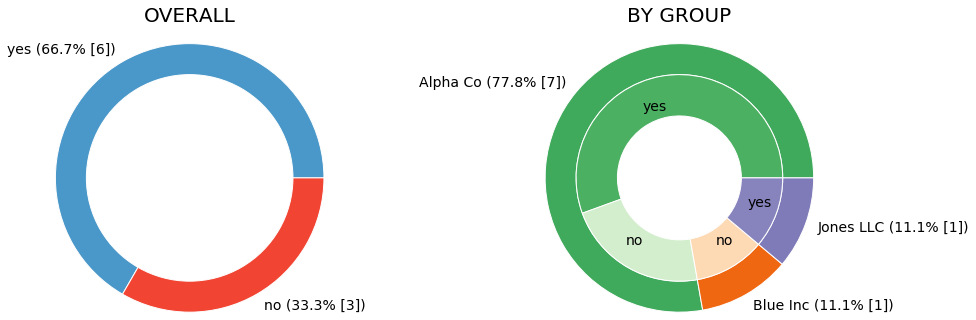

In [11]:
donut_plot_with_total_binary_summary_and_binary_state_subgroups(df_file="data.pkl",binary_state_col ="In_Stock",grouping_col="Manufacturer");

Note: No list to specify high to low intensity coloring provided, and so using 'yes,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order.

Plot figure object returned.

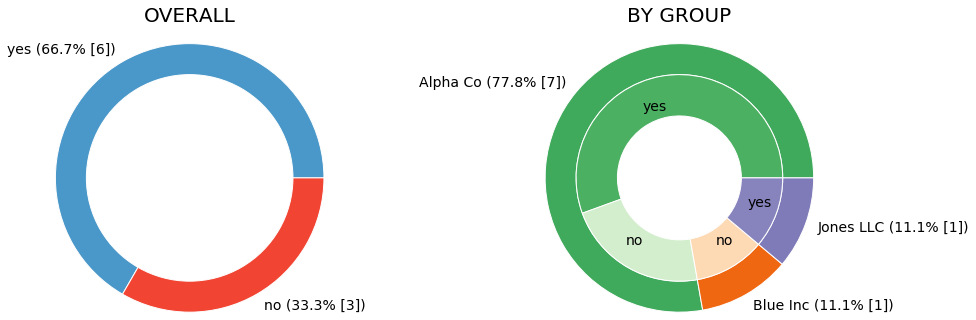

In [12]:
donut_plot_with_total_binary_summary_and_binary_state_subgroups(df_file="data.pkl",binary_state_col ="In_Stock",grouping_col="Manufacturer");

However, the function can also take an in-memory dataframe directly. Let's next see a demonstration of that. 

To be sure a dataframe is in memory, we'll read in one from the file saved earlier.  
You may note that this step is redundant if you are running all these cells in order, and the one made earlier is in memory still; however, I want to be sure all is on the same page before the next steps while emphasizing here the switch from using a file as data to something in the memory of the current notebook.

In [13]:
df = pd.read_pickle("data.pkl")

We can look at the start of that dataframe to verify it is in memory now.

In [14]:
df.head()

,Manufacturer,Item,In_Stock
0,Jones LLC,177887,yes
1,Alpha Co,157987,yes
2,Alpha Co,158981,yes
3,Alpha Co,159983,yes
4,Alpha Co,167987,yes


Note: No list to specify high to low intensity coloring provided, and so using 'yes,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order.

Plot figure object returned.

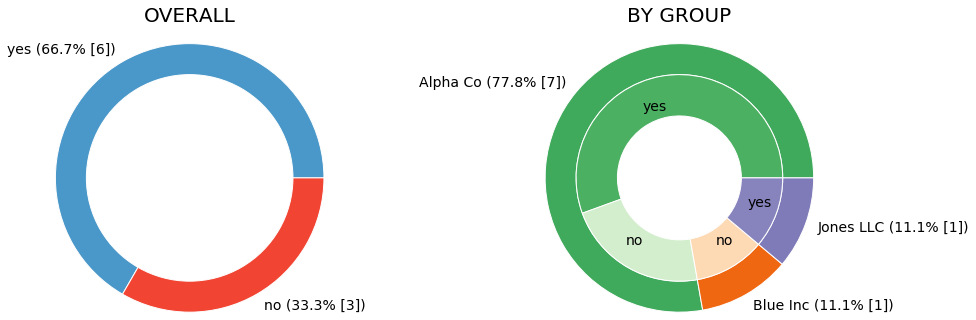

In [15]:
x = donut_plot_with_total_binary_summary_and_binary_state_subgroups(df=df,binary_state_col ="In_Stock",grouping_col="Manufacturer")

The size of the plot can be set a couple of ways when running the script as a function.

About size, the script is run with `fig=plt.figure(figsize=(16.09,4.75))` set by the 'default' setting `plot_figure_size`.

`plot_figure_size` can be adjusted in the script.  
Alternatively, and perhaps easier when working in Jupyter or IPython, the resulting plot can be enlarged after the fact with `x.figure.set_size_inches((28, 9))`.
(Note setting adjusting `plot_figure_size` in the current version of script to give to `fig=plt.figure(figsize=(28, 9))`and restarting kernel and running again will also give that.)

The adjusted figure can be saved as shown in the example, too.

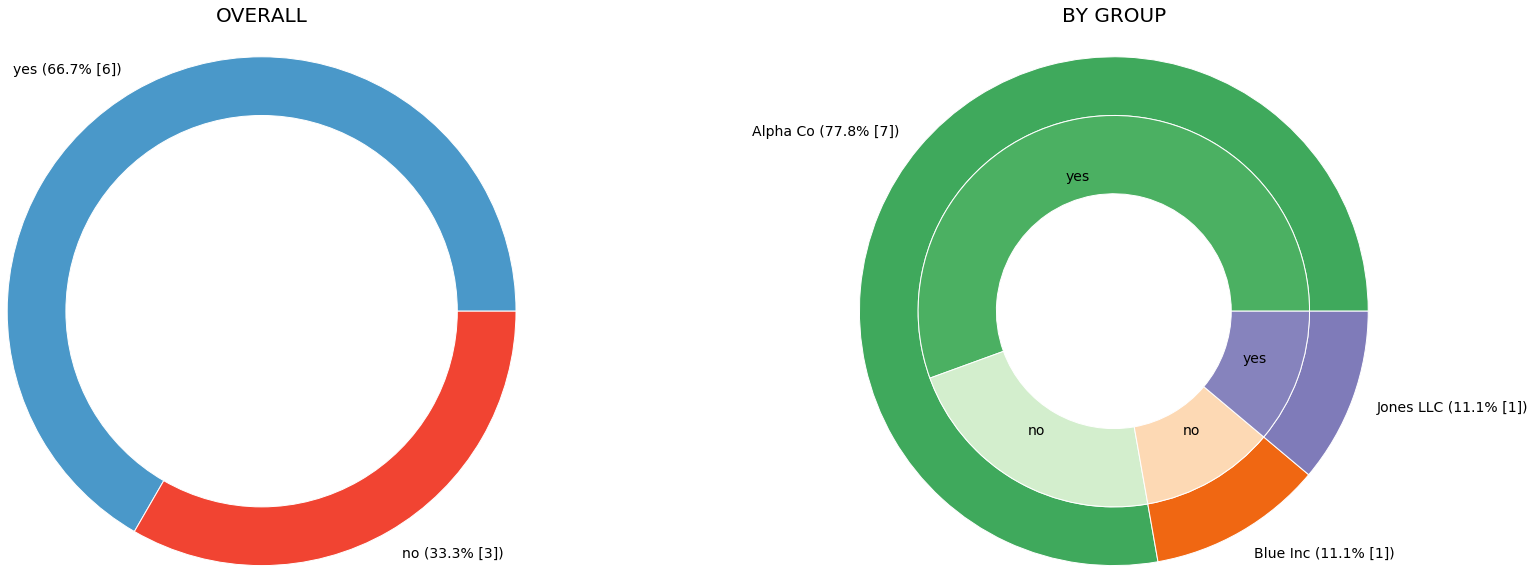

In [16]:
import matplotlib.pyplot as plt
#x.figure(figsize=(17, 11)) # Doesn't work
#plt.figure(figsize=(17, 11)) # Doesn't work
x.figure.set_size_inches((28, 9)) #<--see bottom of section at 
# https://nbviewer.jupyter.org/github/fomightez/cl_sq_demo-binder/blob/master/notebooks/Demo%20of%20script%20to%20plot%20nt%20imbalance%20for%20sequence%20span.ipynb#Use-script-in-a-Jupyter-notebook
x.figure.savefig("larger_demo.png")
x.figure

Because of the way Jupyter nicely renders the image in the cell it can be hard to tell how much the size has changed. And so I added saving the plots as images that **you can open the image files and compare**.

That way of adjusting size doesn't change settings for all plots. As can be seen by the next cell. However, it changes size of `x` until it is reassigned.

Note: No list to specify high to low intensity coloring provided, and so using 'yes,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order.

Plot figure object returned.

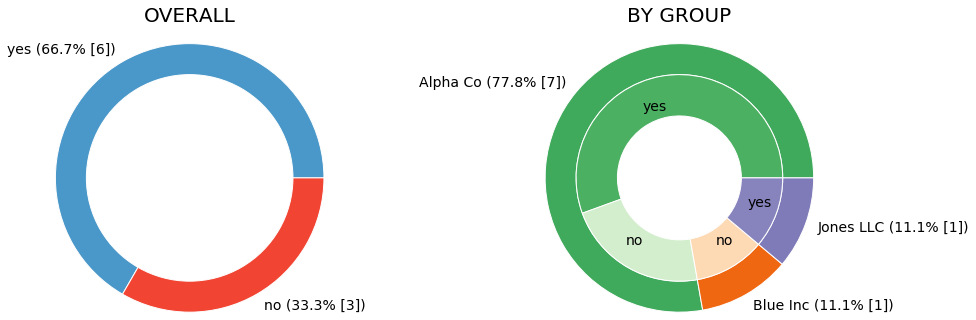

In [17]:
y = donut_plot_with_total_binary_summary_and_binary_state_subgroups(df=df,binary_state_col ="In_Stock",grouping_col="Manufacturer")

If you start adjusting `plot_figure_size` in the script to a large degree, you may also want to adjust text size settings below that under 'USER ADJUSTABLE VALUES' in the script. Another possibility is turning off plot titles using `include_subplot_titles=False`, also under 'USER ADJUSTABLE VALUES', in favor of adding your own in post-processing.

---- 

## Using a 'High-Low List'

Often you won't quite see the default settings produce the shading intensity you'd like for each subgroup.

If that is the case you can provide a list of the subgroups specifying the order. Because this is so important, I have made it an entire section. This will demonstrate it from the command line equivalent and then using the script's main function.

First we need a dataframe that will demonstrate the benefit.

In [18]:
import pandas as pd
sales = [('Jones LLC', 19897, 'no'),
         ('Jones LLC', 1187, 'no'),
         ('Jones LLC', 177887, 'yes'),
         ('Jones LLC', 12387, 'yes'),
         ('Jones LLC', 1772287, 'yes'),
         ('Jones LLC', 19897, 'no'),
         ('Jones LLC', 1187, 'no'),
         ('Alpha Co', 159333, 'no'),
         ('Alpha Co', 256521, 'no'),
         ('Alpha Co', 157987, 'yes'),
         ('Alpha Co', 158981, 'yes'),
         ('Alpha Co', 159983, 'yes'),
         ('Alpha Co', 167987, 'yes'),
         ('Alpha Co', 158117, 'yes'),
         ('Blue Inc', 111947, 'no')]
labels = ['Manufacturer', 'Item', 'In_Stock']
dfh = pd.DataFrame.from_records(sales, columns=labels)
dfh.head()

,Manufacturer,Item,In_Stock
0,Jones LLC,19897,no
1,Jones LLC,1187,no
2,Jones LLC,177887,yes
3,Jones LLC,12387,yes
4,Jones LLC,1772287,yes


In [19]:
dfh.to_csv('datahl.tsv', sep='\t',index = False)

Now to run that without a High-Low list.

Note: No list to specify high to low intensity coloring provided, and so using 'no,yes',
where leftmost identifer corresponds to most intense and rightmost is least.
Look into adding use of the `--hilolist` option to specify the order.


Plot image saved to: donut_plot.png


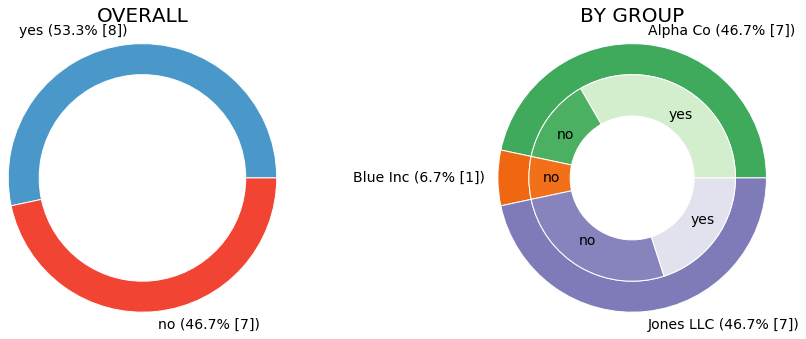

In [20]:
%run donut_plot_with_total_binary_summary_and_binary_state_subgroups.py datahl.tsv In_Stock Manufacturer 

Note that just because of the way the subgroup categories occured in the defining of the dataframe 'yes' is last in the intensity coloring. Although one would probably want 'no' the least intensely shaded, and the 'yes' category intensely colored.

This can be fix with the addition of a 'high-low' list.


Plot image saved to: donut_plot.png


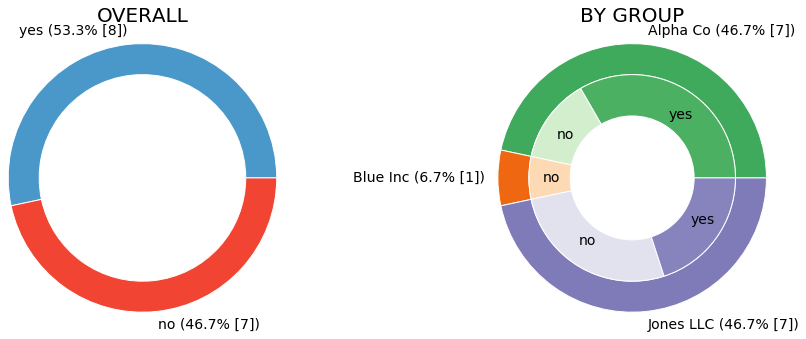

In [21]:
%run donut_plot_with_total_binary_summary_and_binary_state_subgroups.py datahl.tsv In_Stock Manufacturer  --hilolist yes,no

Note that now the 'no' subgroup is the lightest shading in all the groups.   
It is important not to place spaces between the commas in the list you provide on the command line.

To do the same with the main function of the script, you provide a Python list as `hilolist`:

Plot figure object returned.

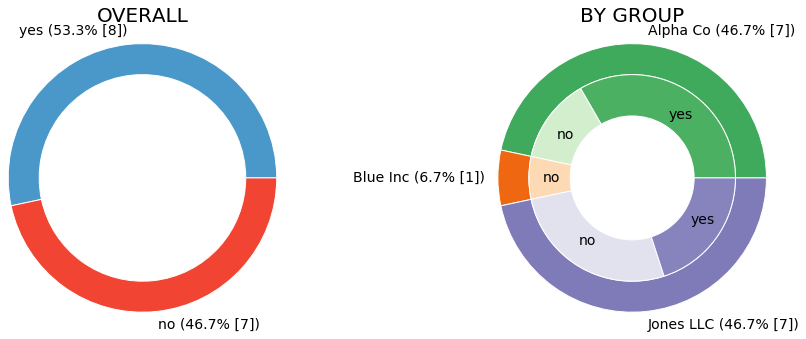

In [22]:
from donut_plot_with_total_binary_summary_and_binary_state_subgroups import donut_plot_with_total_binary_summary_and_binary_state_subgroups
h = donut_plot_with_total_binary_summary_and_binary_state_subgroups(df=dfh,binary_state_col ="In_Stock",grouping_col="Manufacturer", hilolist=["yes", "no"]);


Note that 'no' subgroup is the latest in all the groups with that. Feel free to remove assigning 'hilolist' and calling the main function to see that change. 

----

## Adjusting the colors used

**Controlling color from the command line.**

The --advance_color option followed by an integer can be added to the call to the script to advance the colors initially used from the sequential color palette generator. This is meant to try to make it easier to customize the output to a color combination that seems pleasing without needing to edit the code in the script. (If you want to specify your own colors, you can edit the list_of_other_good_sequences and run the with -ac 4. [Alternatively you can edit the color_brewer_seq_names and not advance the color generator.])


Note: No list to specify high to low intensity coloring provided, and so using 'yes,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Look into adding use of the `--hilolist` option to specify the order.


Plot image saved to: donut_plot.png


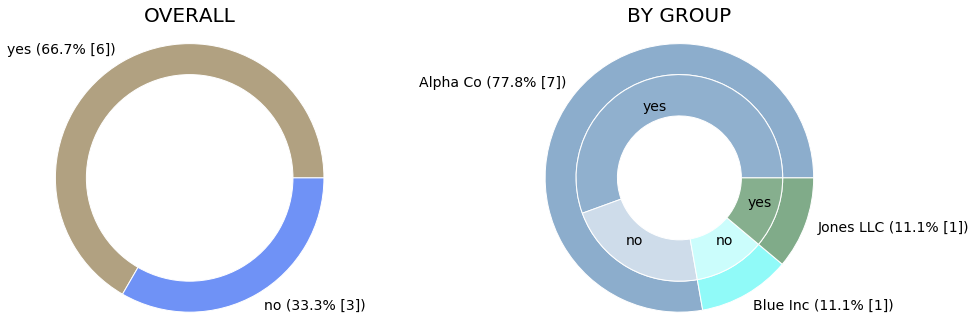

In [23]:
%run donut_plot_with_total_binary_summary_and_binary_state_subgroups.py data.tsv In_Stock Manufacturer --advance_color 61

That works. But now the 'no' category in the subplot on the left, i.e., the summary of total, is associated with a bright blue and the positive 'yes' category' has a drab tan.

Fortunately there is  an argument that can be added when calling the script to reverse the colors.   
That argument is `--swap_left_colors` and it is demonstrated below:

Note: No list to specify high to low intensity coloring provided, and so using 'yes,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Look into adding use of the `--hilolist` option to specify the order.


Plot image saved to: donut_plot.png


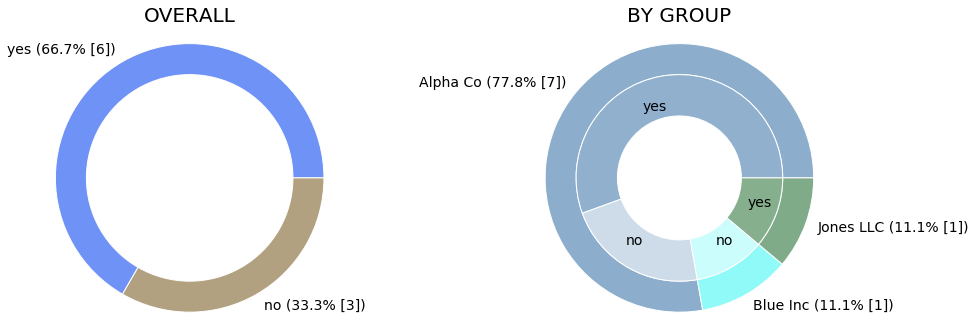

In [24]:
%run donut_plot_with_total_binary_summary_and_binary_state_subgroups.py data.tsv In_Stock Manufacturer --advance_color 61 --swap_left_colors

That reverses the colors applied the the categories in the left subplot. Keep in mind that since this script deals with situations where there are only ever two states, that can be handy to switch around colors if the default isn't optimal.    

So, let's imagine for sake of illustrating some other options, we are very happy with the colors on the left now; however, we aren't happy though with the colors on the right. We started off this section on controlling the color by demonstrating the use of the `--advance_color`.    
There is a similar option, --advance_right_color, that can be used that just applies this advancing of the color palette choices to the right subplot and not both. This also takes an integer indicating the number of steps to take. To demonstate that:

Note: No list to specify high to low intensity coloring provided, and so using 'yes,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Look into adding use of the `--hilolist` option to specify the order.


Plot image saved to: donut_plot.png


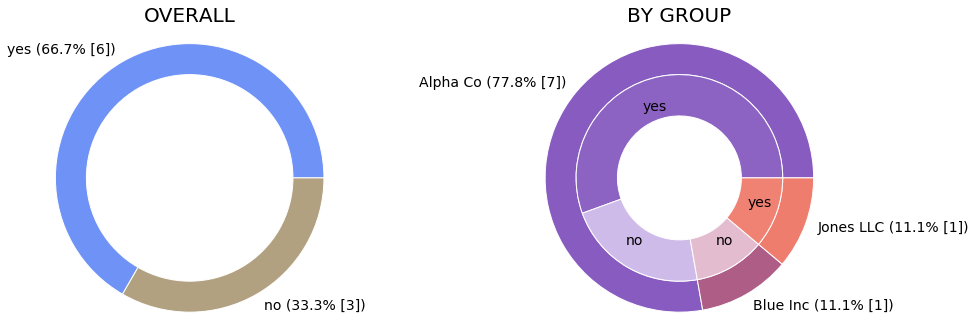

In [25]:
%run donut_plot_with_total_binary_summary_and_binary_state_subgroups.py data.tsv In_Stock Manufacturer --advance_color 61 --swap_left_colors --advance_right_color 3

So on top of advancing the overall color many steps, we advanced the color palette on the right a few more steps to change what is displayed on that side.

**Controlling color via the main imported function.**

There are similar abilities for when the main function is called from IPython/Jupyter although the exact names and how they are set differs. The parallel options above are illustrated for using the function.

An amount of times to advance the color from the starting options can be specified when calling the function using the `advance_color_increments` variable assigned to the amount of steps to advance.

Note: No list to specify high to low intensity coloring provided, and so using 'yes,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order.

Plot figure object returned.

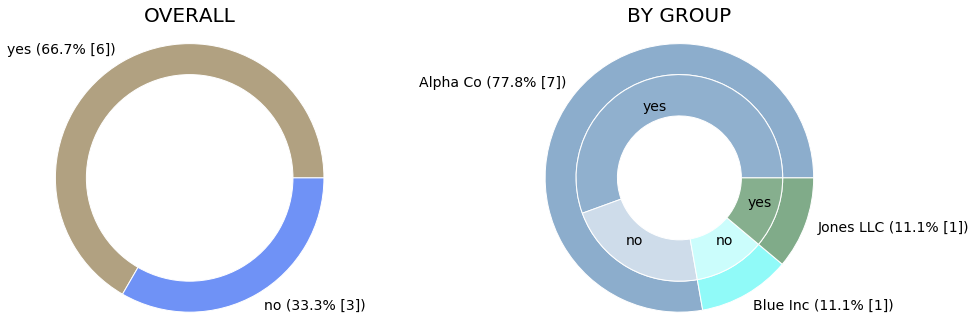

In [26]:
c = donut_plot_with_total_binary_summary_and_binary_state_subgroups(df=df,binary_state_col ="In_Stock",grouping_col="Manufacturer",advance_color_increments=61);

If trying different numbers for the advancing increments still fails to help you find a color combination you like, then you can specify your own colors. You can do that by editing the `list_of_other_good_sequences` and then running the function the with `-ac 4`. (Alternatively you can edit the `color_brewer_seq_names` and not advance the color generator.) To re-import updated the function after editing. The easiest thing to do is restart the kernel in the notebook.

For swapping the colors in the subplot on the left, when calling the function you set `swap_left_colors = True`.

Note: No list to specify high to low intensity coloring provided, and so using 'yes,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order.

Plot figure object returned.

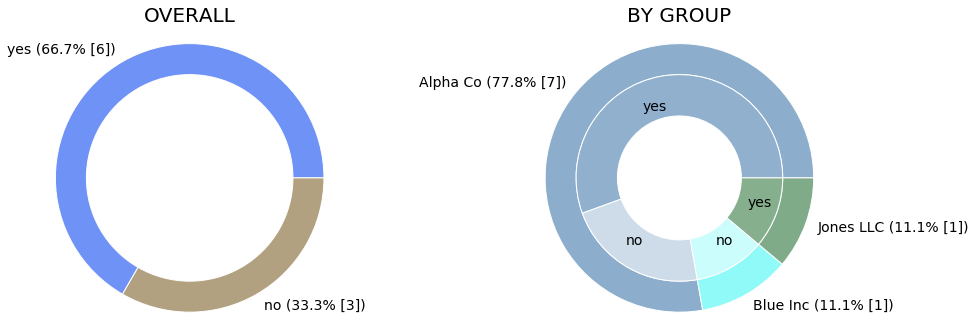

In [27]:
c = donut_plot_with_total_binary_summary_and_binary_state_subgroups(df=df,binary_state_col ="In_Stock",grouping_col="Manufacturer",advance_color_increments=61,swap_left_colors = True);

The amount of times to advance the color palette for just the subplot on the right can also be provided to help customize the colors. Here you supply `advance_right_color_increments` followed by a value of the number of steps to advance the paletter beyond the default.  
Next we'll use `advance_right_color_increments=21`.

Note: No list to specify high to low intensity coloring provided, and so using 'yes,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order.

Plot figure object returned.

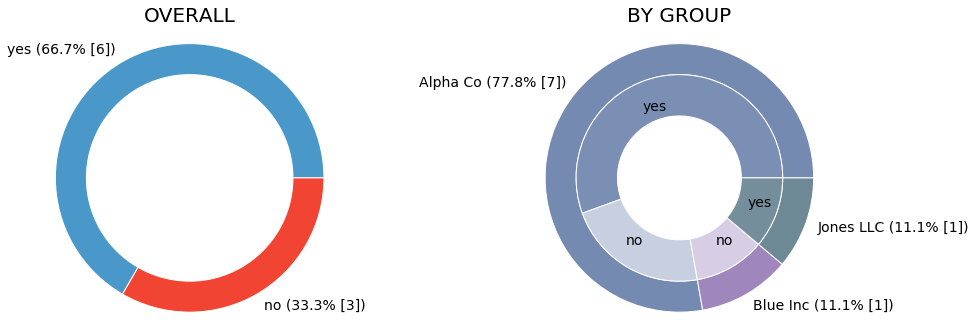

In [28]:
c = donut_plot_with_total_binary_summary_and_binary_state_subgroups(df=df,binary_state_col ="In_Stock",grouping_col="Manufacturer",advance_right_color_increments=21);

While it may take some trial and error to get the right settings and combinations, once you have them established they will be reproducible.

-----

## Changing the plot title

You'll probably want to make the plot titles better reflect your data or delete them. Because sending text from the command line is fraught with issues, I am going to show you ways to specifically edit the script so you can use it form the command line. This will be covered first. 

The situation is easier if you are using importing and calling the main function of the script. That will be covered second.

**Using the script at the command line or equivalent**

I'll provide two ways to do this. The first for advanced command line users and one for those concerned about editing a complex command that has the potential to erase a file.  
If you are comfortable with using complex commands on the command line you could edit the text `NEW TITLE GOES HERE` the following line to change the title.

In [29]:
!sed -i 's/OVERALL/OVERALL TITLE GOES HERE/g' donut_plot_with_total_binary_summary_and_binary_state_subgroups.py
!sed -i 's/BY GROUP/NEW TITLE GOES HERE/g' donut_plot_with_total_binary_summary_and_binary_state_subgroups.py

The changes can be undone with the following:

In [30]:
!sed -i 's/OVERALL TITLE GOES HERE/OVERALL/g' donut_plot_with_total_binary_summary_and_binary_state_subgroups.py
!sed -i 's/NEW TITLE GOES HERE/BY GROUP/g' donut_plot_with_total_binary_summary_and_binary_state_subgroups.py

If you aren't comfortable with editing that complex command, the following makess a function that can be called with the new title.

In [31]:
script_name = "donut_plot_with_total_binary_summary_and_binary_state_subgroups.py"
def change_original_titles(o,s):
    '''
    Change the plot titles to the provided text.
    'Overall' plot title is provided first.
    '''
    with open(script_name, 'r') as thefile:
        script=thefile.read()
    script = script.replace('OVERALL', o)
    with open(script_name, 'w') as output_file:
        output_file.write(script)
    with open(script_name, 'r') as thefile:
        script=thefile.read()
    script = script.replace('BY GROUP', s)
    with open(script_name, 'w') as output_file:
        output_file.write(script)

Now to use it. Call the function, placing the new title between the quotes, like so:

In [32]:
change_original_titles("OVERALL TITLE GOES HERE","NEW TITLE GOES HERE")

You could use the command in the form `change_original_titles('OVERALL TITLE GOES HERE','NEW TITLE GOES HERE')` if you needed to provide double-quotes as part of the title.

To verify that worked:

Note: No list to specify high to low intensity coloring provided, and so using 'yes,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Look into adding use of the `--hilolist` option to specify the order.


Plot image saved to: donut_plot.png


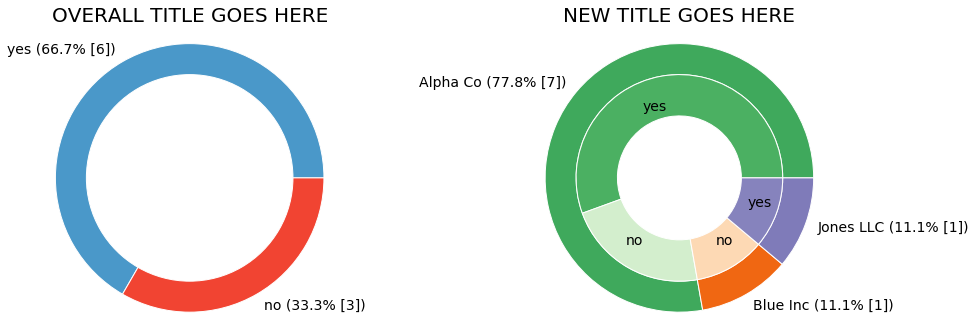

In [33]:
%run donut_plot_with_total_binary_summary_and_binary_state_subgroups.py data.tsv In_Stock Manufacturer

You can provide a space between the quotes or nothing to make no title display.

The problem with this approach is that you can only use those solutions once as they are written.  And the restore commands I provided above only works when changing to the example text, which is probably now what you want to use. You may be better off editing the script directly, or restore the following lines back under 'USER ADJUSTABLE VALUES' in the script if you have to change it more than once from the command line.

```python
total_plot_title = "OVERALL"
group_plot_title = "BY GROUP"
```

Let's set up for the other route by undoing these changes.

In [34]:
!sed -i 's/OVERALL TITLE GOES HERE/OVERALL/g' donut_plot_with_total_binary_summary_and_binary_state_subgroups.py
!sed -i 's/NEW TITLE GOES HERE/BY GROUP/g' donut_plot_with_total_binary_summary_and_binary_state_subgroups.py


**Calling the main function of the script**

More flexibility is available when importing the main function of the script. Here are a couple of examples taking advantage of setting `total_plot_title` and `group_plot_title`:

Note: No list to specify high to low intensity coloring provided, and so using 'yes,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order.

Plot figure object returned.

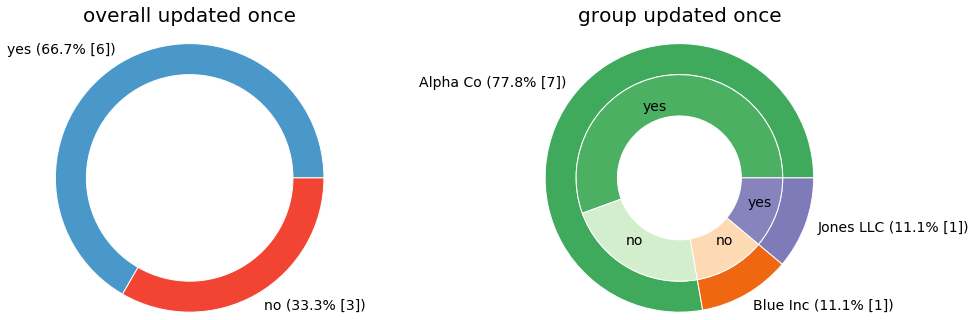

In [35]:
from donut_plot_with_total_binary_summary_and_binary_state_subgroups import donut_plot_with_total_binary_summary_and_binary_state_subgroups
m = donut_plot_with_total_binary_summary_and_binary_state_subgroups(df=df,binary_state_col ="In_Stock",grouping_col="Manufacturer",total_plot_title = "overall updated once",group_plot_title = "group updated once");

Note that this doesn't change the default. We can run the script, and we'll see the original default still.

Note: No list to specify high to low intensity coloring provided, and so using 'yes,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Look into adding use of the `--hilolist` option to specify the order.


Plot image saved to: donut_plot.png


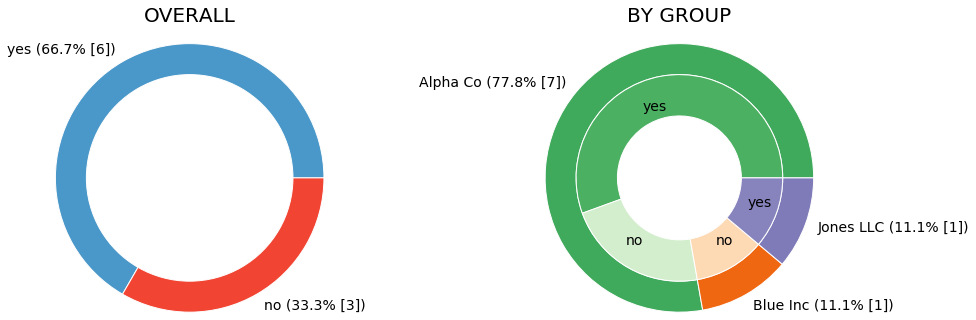

In [36]:
%run donut_plot_with_total_binary_summary_and_binary_state_subgroups.py data.tsv In_Stock Manufacturer

And calling the function with assignments for `total_plot_title` and `group_plot_title` has the advantage that we can keep changing the title now.

Note: No list to specify high to low intensity coloring provided, and so using 'yes,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order.

Plot figure object returned.

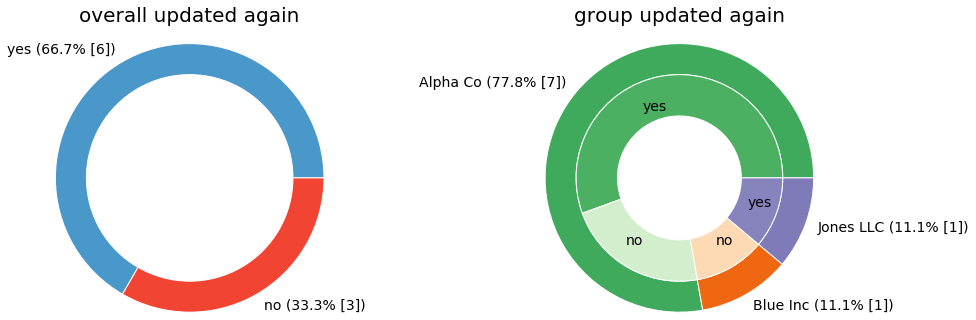

In [37]:
donut_plot_with_total_binary_summary_and_binary_state_subgroups(df=df,binary_state_col ="In_Stock",grouping_col="Manufacturer",total_plot_title = "overall updated again",group_plot_title = "group updated again");

To remove BOTH the titles call the function with `include_subplot_titles=False`. What each individual title is assigned doesn't matter if `include_subplot_titles` is set to False.

Note: No list to specify high to low intensity coloring provided, and so using 'yes,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order.

Plot figure object returned.

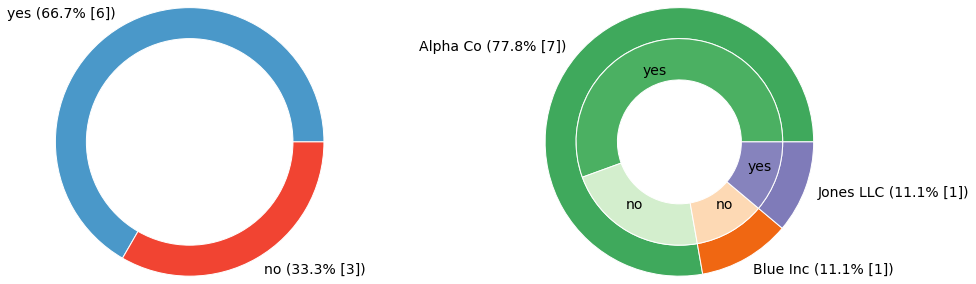

In [38]:
donut_plot_with_total_binary_summary_and_binary_state_subgroups(df=df,binary_state_col ="In_Stock",grouping_col="Manufacturer",include_subplot_titles=False);

You could just leave one by replacing the other with a space or nothing.

Note: No list to specify high to low intensity coloring provided, and so using 'yes,no',
where leftmost identifer corresponds to most intense and rightmost is least.
Provide a Python list as `hilolist` when calling the function to specify the order.

Plot figure object returned.

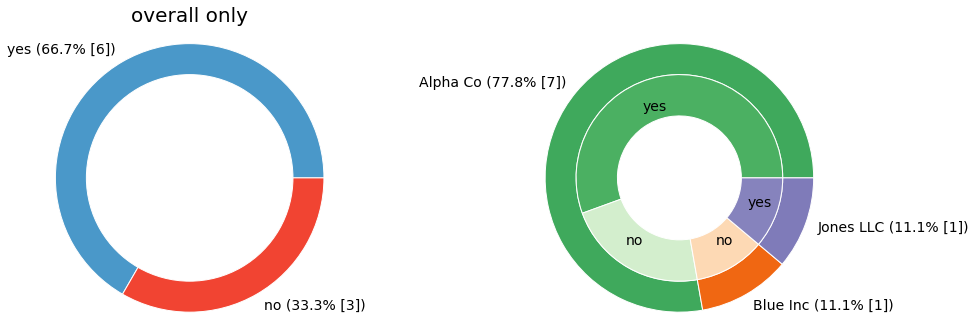

In [39]:
donut_plot_with_total_binary_summary_and_binary_state_subgroups(df=df,binary_state_col ="In_Stock",grouping_col="Manufacturer",total_plot_title = "overall only",group_plot_title = "");

----

## Alternative: Data table form
    
In the case of the examples seen here, the groupings and subgroups are not too many that information would be too heard to track in text form. And so I'll point out the alternative could just be to show this in text form in a dataframe.

I have a script available [here](https://github.com/fomightez/text_mining) that makes nice summary from the same type of data as the donut plots above use and I'll demonstrate it in this section using the data used in the section 'Using a 'High-Low List' above, again.

(As always, the dataframe that is made isn't as nicely rendered statically via Github [unlike the donut plots], but is via [nbviewer.org](https://nbviewer.jupyter.org/).)

In [40]:
import os
file_needed = "df_binary_states2summary_df.py"
if not os.path.isfile(file_needed):
    !curl -OL https://raw.githubusercontent.com/fomightez/text_mining/master/df_binary_states2summary_df.py
%run df_binary_states2summary_df.py data.tsv Manufacturer In_Stock yes --bracket_counts
bc = pd.read_pickle("summary_data.pkl")
bc

Summary dataframe saved as a text table easily opened in
different software; file named: `summary_data.tsv`. This version meant for presenation only.

Summary dataframe saved in pickled form for ease of use within
Python; file named: `summary_data.pkl`. This version meant for
presentation only.


**Also saving data table as forms easier to handle for subsequent steps:**
Summary dataframe saved as a text table easily opened in
different software; file named: `summary_basic_data.tsv`

Summary dataframe saved in pickled form for ease of use within
Python; file named: `summary_basic_data.pkl`. This will retain the column headers/names formatting best.

,[n],In_Stock
ALL,9.0,66.67% [6]
Alpha Co,7.0,71.43% [5]
Blue Inc,1.0,0.00% [0]
Jones LLC,1.0,100.00% [1]


(Note there are many more alternatives this script can produce depending on the arguments when the script is called or the main function used, see [here](https://github.com/fomightez/text_mining) for a link to a demo of that script for more about that.)

That data table is an alternative/complement to the donut plot produced above and to make comparison easier I'll reshow that plot in the cell below:

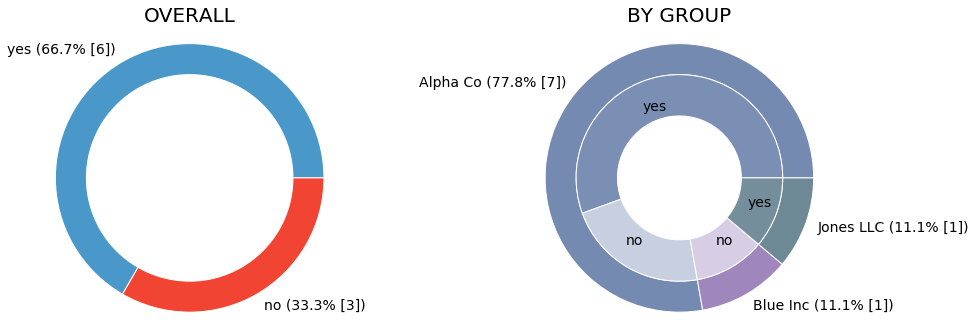

In [42]:
c.figure

----

----

If you'd like to better understand how the underlying code for this script works, see [a previous one](demo_basics_from_df.ipynb) in the series.  
If you'd like another option for scripts/functions that generate plots that feature summary plots in addition to a plot with subgroups, check out the following notebook in the series: 

- [Demonstrate a full-featured script that plots a summary for binary data in addition to the donut plot with the binary group broken down by a group](demo_summary_subgroups.ipynb)

If you'd like an option like the plot on the right here, but don't want a summary, see [here](index.ipynb).

----


----